# An End-to-End Project on Time Series Analysis and Forecasting with Python
### https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
![title](1_BhXS4VyhnUQlrF1Yfe0AIQ.jpeg)

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_excel("C:/Users/benabdi1/Machine_learning_projects_31_05_2019/Time_series_forcasting_ARIMA_model/Superstore.xls")

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df =df.loc[df['Category'] == 'Furniture']
df['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [6]:
print('Minimum date = ',df['Order Date'].min(),'\nMaximum date = ',df['Order Date'].max())

Minimum date =  2014-01-06 00:00:00 
Maximum date =  2017-12-30 00:00:00


In [7]:
len(df['Order Date'].unique()) #--We've  more  than 1000 repeated values 

889

# Data Preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
#-- Removing no needed columns 
df = df[['Order Date','Sales']]

In [10]:
#-- Check missing  values , data  imputation techniques application 
df['Order Date'].isnull().sum() #-- No null values 

0

In [11]:
#-- Sum monthly sale amount 
furniture = df.groupby('Order Date')['Sales'].mean().reset_index()#to_frame() #-- Output  of  grouby is  a  serie object 

In [12]:
len(furniture['Order Date'].unique()) / 365

2.4356164383561643

# Indexing with Time Series Data

In [13]:
furniture.set_index('Order Date',inplace = True)

### Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [14]:
y = furniture['Sales'].resample('MS').mean()

In [15]:
#-- Have a quick peek 2017 furniture sales data.
y['2015':].to_frame().head()

,Sales
Order Date,
2015-01-01,818.741050
2015-02-01,298.203111
2015-03-01,524.500305
2015-04-01,353.717632
2015-05-01,244.838125


# Visualizing Furniture Sales Time Series Data

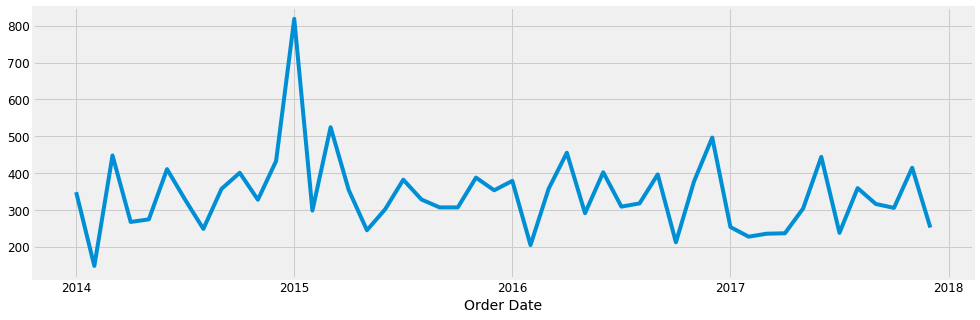

In [16]:
y.plot(figsize=(15,5))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

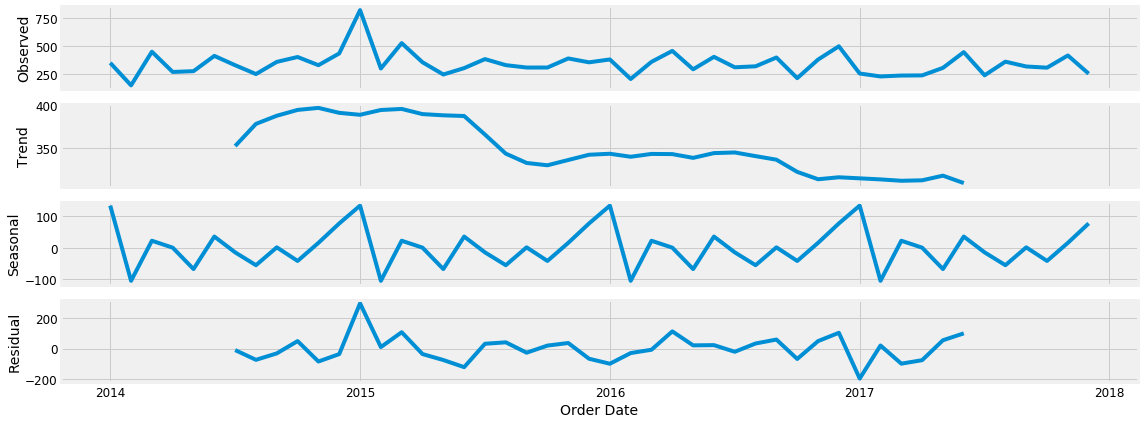

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

# Time series forecasting with ARIMA

In [18]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:687.9945363166188
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1505.8042673491798
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:438.79752691478
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:461.9914104428708
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1566.0531503228744
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:303.0690131148559
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.9065809161225
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:427.47007673121567
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:462.0825326183884
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2960.4742049228416
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:304.93256922463524
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:596.0247913475149
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1118.0112193688847
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:444.2951952332877
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:445.88289074591205
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1409.4682493264575
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:304.3869251635162
ARIMA(0, 1, 1)x(0,

## The  above value shows that  ARIMA(1, 1, 1)x(1, 1, 0, 12) yields  the  lowest AIC value , therefore  we should consider this to be  our  optimal option 

In [20]:
from statsmodels.tsa.arima_model import ARIMA


model_arima = ARIMA(train,order=(param))
model_arima_fit  = model_arima.fit()

NameError: name 'train' is not defined

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts

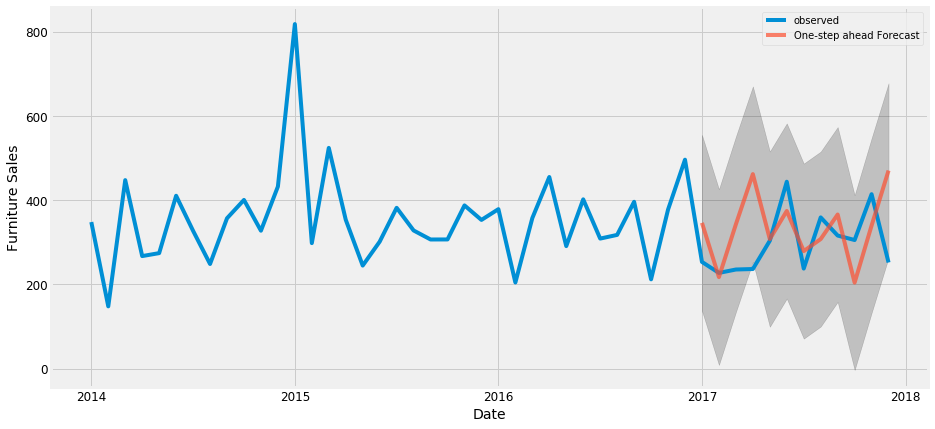

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'))#dynamic=False)

pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [23]:

y_forecasted = pred.predicted_mean #-- forcasted values
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 12203.91


## The Mean Squared Error of our forecasts is 22993.58

In [159]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


In [158]:
print(y_forecasted)
print(y_truth)
((y_truth - y_forecasted)** 2).mean()

Order Date
2017-01-01     550.096828
2017-02-01     376.886544
2017-03-01     640.883863
2017-04-01     717.478401
2017-05-01     691.391286
2017-06-01     815.732095
2017-07-01     776.952586
2017-08-01     729.182867
2017-09-01    1149.878708
2017-10-01     633.943245
2017-11-01    1291.341352
2017-12-01    1417.169501
Freq: MS, dtype: float64
Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


22993.566372521964

# Producing and visualizing forecasts

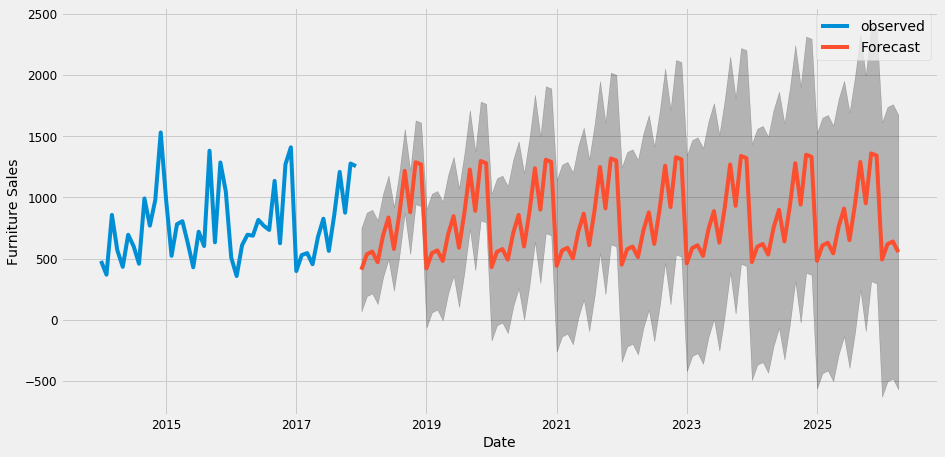

In [164]:
pred_uc = results.get_forecast(steps=100) #- results.get_prediction / results.get_forcast 
pred_ci = pred_uc.conf_int() #-- make  some  extended  researchs

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
#-- plot  the confidence  intervall -- # 

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()